In [17]:
pip install lxml  # Optional: Required for BeautifulSoup to parse HTML/XML
//runned all the pip install commands one by one

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 4.2/8.2 MB 6.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')


In [13]:
df = pd.read_csv('train.csv')

In [15]:
new_df = df.sample(30000,random_state=2)

In [16]:
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  
289024  As an individual, do I really need to care wha...             1  
3454    What are your views on the latest sex scandal ...             0  
92547   What Jobs are available on Cruise Ships for a ...             0  
102544  Is time travel still theorized as being possible?             1  
173136  How should you prepare your body before gettin...             1

In [17]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [18]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [25]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [19]:
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  
289024  As an individual, do I really need to care wha...             1  
3454    What are your views on the latest sex scandal ...             0  
92547   What Jobs are available on Cruise Ships for a ...             0  
102544  Is time travel still theorized as being possible?             1  
173136  How should you prepare your body before gettin...             1

In [20]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [21]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  
289024      68      70            15            14  
3454        48      71             8            14  
92547       46      61             7            11  
102544      38      49             8             8  
173136      57      57             8             9

In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
289024      68      70            15            14            9  
3454        48      71             8            14            1  
92547       46      61             7            11            0  
102544      38      49             8             8            3  
173136      57      57             8             9            5

In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [25]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
289024      68      70            15            14            9          28  
3454        48      71             8            14            1          22  
92547       46      61             7            11            0          18  
102544      38      49             8             8            3          15  
173136      57      57             8             9            5          17

In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
289024      68      70            15            14            9          28   
3454        48      71             8            14            1          22   
92547       46      61             7            11            0          18   
102544      38      49             8             8            3          15   
173136      57      57             8             9            5          17   

        word_share  
289024        0.32  
3454          0.05  
92547         0.00  
102544        0.20  
173136        0.29

In [37]:
pip install nltk


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.1 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install certifi


  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords corpus if not already done

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charupatelbaghi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [29]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [30]:
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
289024      68      70            15            14  ...          28   
3454        48      71             8            14  ...          22   
92547       46      61             7            11  ...          18   
102544      38      49             8             8  ...          15   
173136      57      57             8             9  ...          17   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
289024        0.32  0.714276  0.555549  0.799984  0.499994  0.642853   
3454          0.05  0.166664  0.111110  0.000000  0.000000  0.124998   
92547         0.00  0.000000  0.000000  0.000000  0.000000  0.000000   
102544        0.20  0.599988  0.499992  0.000000  0.000000  0.374995   
173136        0.29  0.399992  0.399992  0.999967  0.749981  0.624992   

         ctc_max  last_word_eq  first_word_eq  
289024  0.599996             1              0  
3454    0.071428             0              0  
92547   0.000000             0              0  
102544  0.374995             0              1  
173136  0.555549             1              0  

[5 rows x 21 columns]

In [32]:
pip install distance

  Using cached Distance-0.1.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [36]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    # Handle cases where either question is empty
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length difference between the tokenized questions
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Find the longest common substrings between the two questions
    strs = list(distance.lcsubstrings(q1, q2))
    
    # Check if any common substrings exist before trying to access strs[0]
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0  # No common substring, so set to 0
    
    return length_features

    

In [37]:
# Assuming new_df is your DataFrame with 'question1' and 'question2' columns
length_features = new_df.apply(fetch_length_features, axis=1)

# Map the results to new columns
new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [39]:
new_df.head()

id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
289024      68      70            15            14  ...  0.555549  0.799984   
3454        48      71             8            14  ...  0.111110  0.000000   
92547       46      61             7            11  ...  0.000000  0.000000   
102544      38      49             8             8  ...  0.499992  0.000000   
173136      57      57             8             9  ...  0.399992  0.999967   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
289024  0.499994  0.642853  0.599996             1              0   
3454    0.000000  0.124998  0.071428             0              0   
92547   0.000000  0.000000  0.000000             0              0   
102544  0.000000  0.374995  0.374995             0              1   
173136  0.749981  0.624992  0.555549             1              0   

        abs_len_diff  mean_len  longest_substr_ratio  
289024             1      14.5              0.275362  
3454               6      11.0              0.102041  
92547              4       9.0              0.063830  
102544             0       8.0              0.333333  
173136             1       8.5              0.431034  

[5 rows x 24 columns]

In [41]:
pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [43]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [44]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
289024  289024   20941    8014   
3454      3454    6846    6847   
92547    92547  154928  154929   
102544  102544   10473    2581   
173136  173136  267166  267167   

                                                question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  is_duplicate  \
289024  As an individual, do I really need to care wha...             1   
3454    What are your views on the latest sex scandal ...             0   
92547   What Jobs are available on Cruise Ships for a ...             0   
102544  Is time travel still theorized as being possible?             1   
173136  How should you prepare your body before gettin...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
289024      68      70            15            14  ...  0.599996   
3454        48      71             8            14  ...  0.071428   
92547       46      61             7            11  ...  0.000000   
102544      38      49             8             8  ...  0.374995   
173136      57      57             8             9  ...  0.555549   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
289024             1              0             1      14.5   
3454               0              0             6      11.0   
92547              0              0             4       9.0   
102544             0              1             0       8.0   
173136             1              0             1       8.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
289024              0.275362          66                  67   
3454                0.102041          34                  49   
92547               0.063830          29                  35   
102544              0.333333          47                  53   
173136              0.431034          62                  63   

        token_sort_ratio  token_set_ratio  
289024                70               77  
3454                  41               46  
92547                 30               30  
102544                54               81  
173136                77               77  

[5 rows x 28 columns]

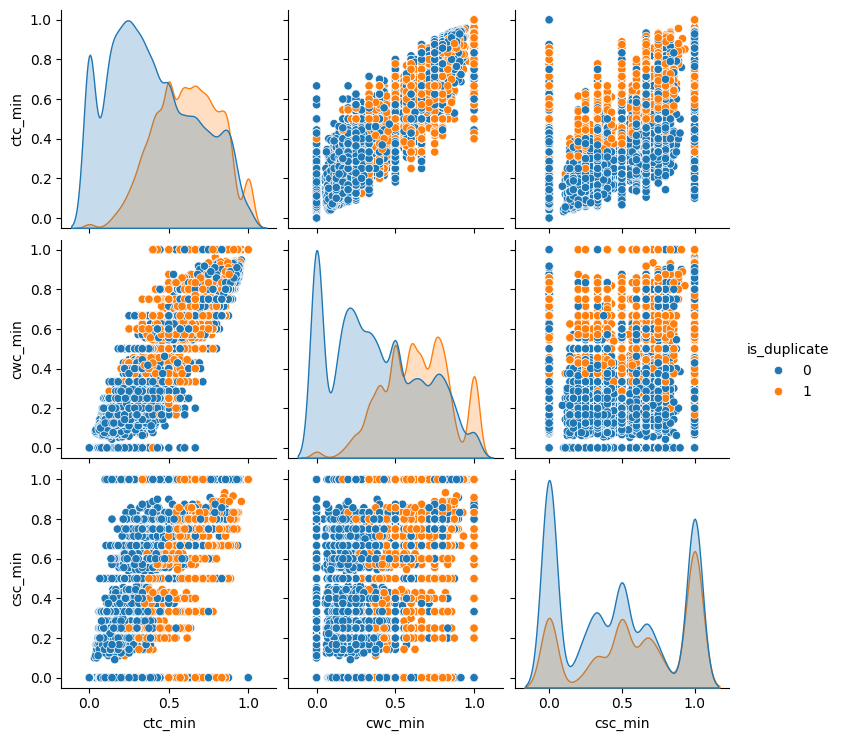

In [45]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

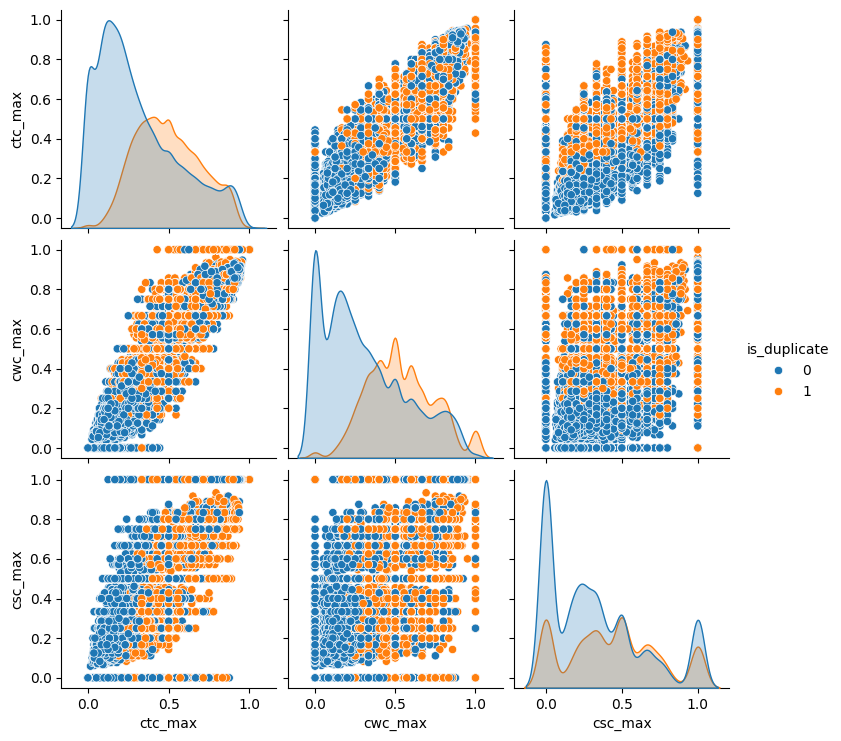

In [46]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

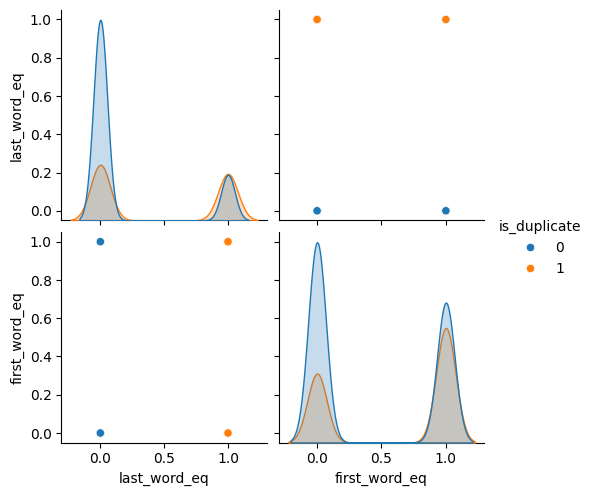

In [47]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

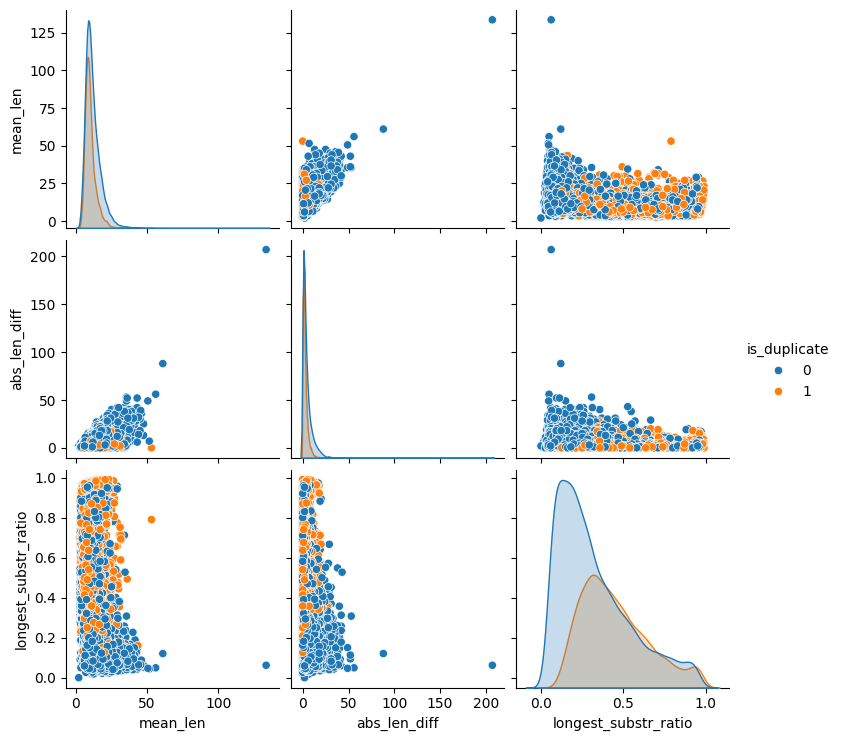

In [48]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

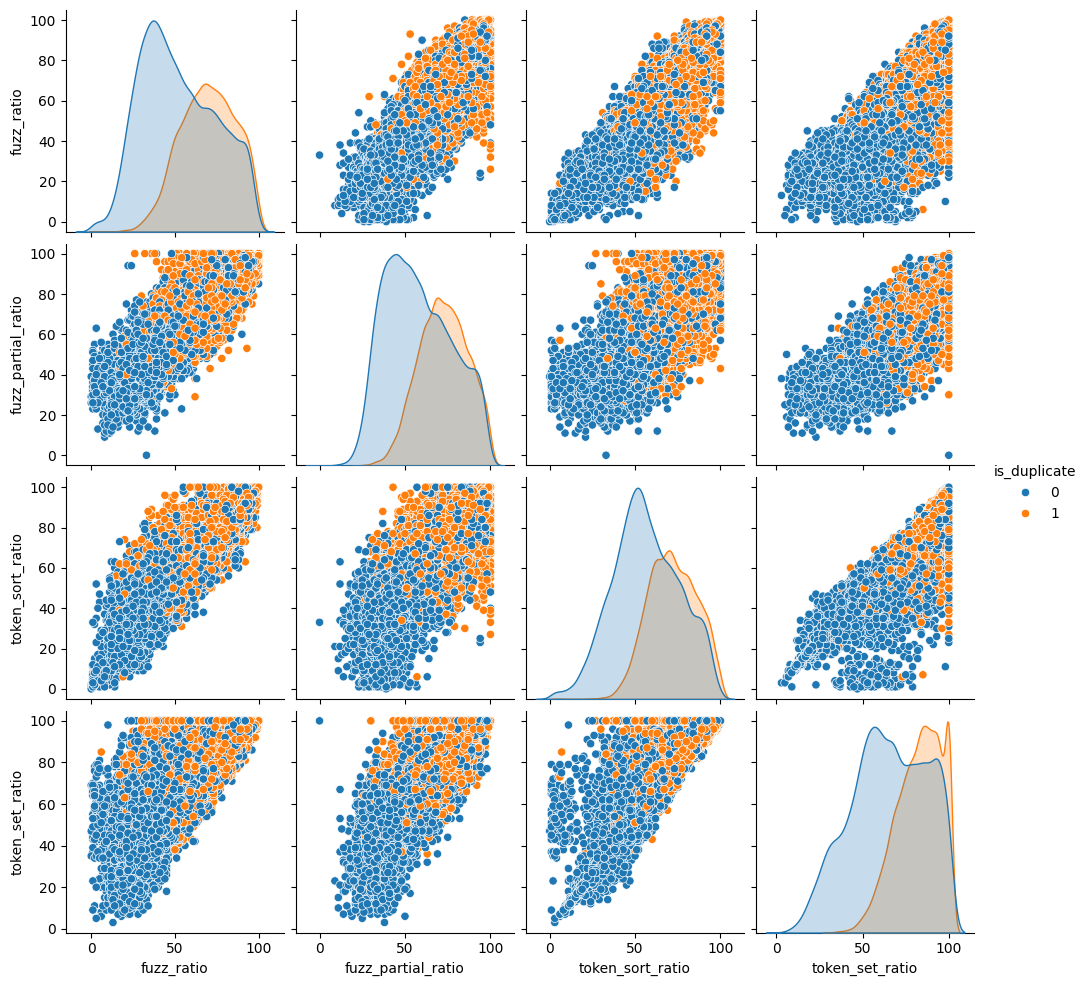

In [49]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [59]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [61]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.018s...
[t-SNE] Computed neighbors for 30000 samples in 2.805s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

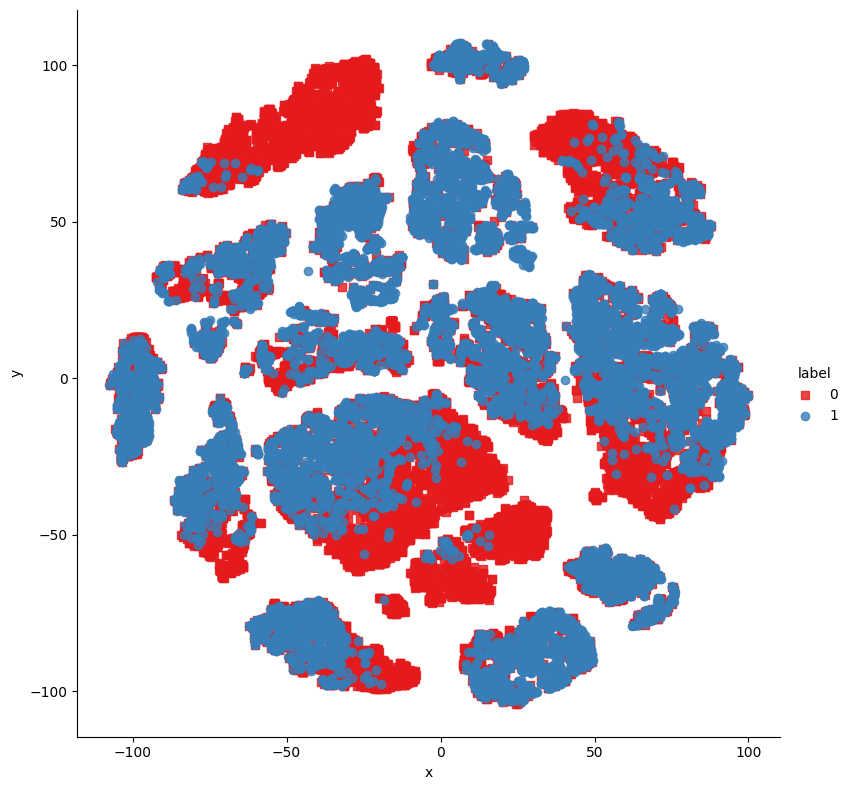

In [65]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])


In [66]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.021s...
[t-SNE] Computed neighbors for 30000 samples in 2.596s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [68]:
pip install plotly


  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 5.6 MB/s eta 0:00:00a 0:00:01
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install notebook ipywidgets


  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.20.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.2 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (33 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.

In [70]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [71]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
289024  What should I do in order not to care about wh...   
3454     Why AAP’s MLA Dinesh Mohaniya has been arrested?   
92547      Requisites to become first time app developer?   
102544             Is it possible to time travel to past?   
173136  What preparation you should make before gettin...   

                                                question2  
289024  As an individual, do I really need to care wha...  
3454    What are your views on the latest sex scandal ...  
92547   What Jobs are available on Cruise Ships for a ...  
102544  Is time travel still theorized as being possible?  
173136  How should you prepare your body before gettin...

In [72]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
289024             1      68      70            15            14            9   
3454               0      48      71             8            14            1   
92547              0      46      61             7            11            0   
102544             1      38      49             8             8            3   
173136             1      57      57             8             9            5   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
289024          28        0.32  0.714276  0.555549  ...  0.599996   
3454            22        0.05  0.166664  0.111110  ...  0.071428   
92547           18        0.00  0.000000  0.000000  ...  0.000000   
102544          15        0.20  0.599988  0.499992  ...  0.374995   
173136          17        0.29  0.399992  0.399992  ...  0.555549   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
289024             1              0             1      14.5   
3454               0              0             6      11.0   
92547              0              0             4       9.0   
102544             0              1             0       8.0   
173136             1              0             1       8.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
289024              0.275362          66                  67   
3454                0.102041          34                  49   
92547               0.063830          29                  35   
102544              0.333333          47                  53   
173136              0.431034          62                  63   

        token_sort_ratio  token_set_ratio  
289024                70               77  
3454                  41               46  
92547                 30               30  
102544                54               81  
173136                77               77  

[5 rows x 23 columns]

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [74]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [75]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
289024             1      68      70            15            14            9   
3454               0      48      71             8            14            1   
92547              0      46      61             7            11            0   
102544             1      38      49             8             8            3   
173136             1      57      57             8             9            5   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
289024          28        0.32  0.714276  0.555549  ...     0     0     0   
3454            22        0.05  0.166664  0.111110  ...     0     0     0   
92547           18        0.00  0.000000  0.000000  ...     0     0     0   
102544          15        0.20  0.599988  0.499992  ...     0     0     0   
173136          17        0.29  0.399992  0.399992  ...     0     0     1   

        2993  2994  2995  2996  2997  2998  2999  
289024     0     0     0     0     0     0     0  
3454       0     0     1     0     0     0     0  
92547      0     0     0     0     0     0     0  
102544     0     0     0     0     0     0     0  
173136     0     0     1     0     0     0     0  

[5 rows x 6023 columns]

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7838333333333334

In [92]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7898333333333334

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3121,  633],
       [ 664, 1582]])

In [96]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3074,  680],
       [ 581, 1665]])

In [97]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [98]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [99]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [100]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [101]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [102]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [103]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [104]:
rf.predict(query_point_creator(q1,q4))

array([1])

In [105]:
cv

CountVectorizer(max_features=3000)

In [106]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))